<a href="https://colab.research.google.com/github/PedroAABR/covid19-brasil/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Importando a tabela owid-codid-data para o codigo
df = pd.read_csv('/content/drive/MyDrive/Planilhas/owid-covid-data.csv', encoding='latin1')

#Selecionando apenas as colunas que possuem o Brasil
brasil = df[df['location'] == 'Brazil'].copy()

#Preenche colunas vazias com 0
brasil.fillna(0, inplace=True)

#Tira o limite de visualização de colunas
pd.set_option('display.max_columns', None)

#Transforma o índice padrão em índice de datas
brasil.set_index('date', inplace=False)

#Ordena por data
brasil.sort_index(inplace=True)


In [34]:
df = pd.read_csv('/content/drive/MyDrive/Planilhas/obito_cartorio.csv', encoding='latin1')

mortes_estados = df

#Preenche colunas vazias com 0
mortes_estados.fillna(0, inplace=True)

#Tira o limite de visualização de colunas
pd.set_option('display.max_columns', None)

#Transforma o índice padrão em índice de datas
mortes_estados.set_index('date', inplace=False)

#Ordena por data
mortes_estados.sort_index(inplace=True)

In [35]:
df1 = pd.read_csv('/content/drive/MyDrive/Planilhas/2020_BR_Region_Mobility_Report.csv', encoding='latin1', low_memory=False)
df2 = pd.read_csv('/content/drive/MyDrive/Planilhas/2021_BR_Region_Mobility_Report.csv', encoding='latin1', low_memory=False)
df3 = pd.read_csv('/content/drive/MyDrive/Planilhas/2022_BR_Region_Mobility_Report.csv', encoding='latin1', low_memory=False)

# Unindo os dados verticalmente (se têm as mesmas colunas)
mobilidade = pd.concat([df1, df2, df3], ignore_index=True)

#Tira o limite de visualização de colunas
pd.set_option('display.max_columns', None)

# Remove múltiplas colunas
mobilidade = mobilidade.drop(['country_region_code', 'country_region', 'iso_3166_2_code','census_fips_code'], axis=1)

#Preenche colunas vazias com 0
mobilidade.fillna(0, inplace=True)

#Transforma o índice padrão em índice de datas
mobilidade.set_index('date', inplace=False)

#Ordena por data
mobilidade.sort_index(inplace=True)

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Planilhas/caso.csv', encoding='latin1')

casos_estados = df

# Remove múltiplas colunas
casos_estados = casos_estados.drop(['city', 'place_type', 'order_for_place','city_ibge_code'], axis=1)

#Tira o limite de visualização de colunas
pd.set_option('display.max_columns', None)

#Preenche colunas vazias com 0
casos_estados.fillna(0, inplace=True)

#Transforma o índice padrão em índice de datas
casos_estados.set_index('date', inplace=False)

#Ordena por data
casos_estados.sort_index(inplace=True)

In [47]:
df1 = pd.read_csv('/content/drive/MyDrive/Planilhas/esus-vepi.LeitoOcupacao_2020.csv', encoding='latin1')
df2 = pd.read_csv('/content/drive/MyDrive/Planilhas/esus-vepi.LeitoOcupacao_2021.csv', encoding='latin1')
df3 = pd.read_csv('/content/drive/MyDrive/Planilhas/esus-vepi.LeitoOcupacao_2022.csv', encoding='latin1')

# Unindo os dados verticalmente (se têm as mesmas colunas)
ocupacao_hospital = pd.concat([df1, df2, df3], ignore_index=True)

# Remove múltiplas colunas
ocupacao_hospital = ocupacao_hospital.drop(['_id', 'cnes', '_p_usuario','estadoNotificacao','municipioNotificacao','municipio','excluido','validado'], axis=1)

#Tira o limite de visualização de colunas
pd.set_option('display.max_columns', None)

#Preenche colunas vazias com 0
ocupacao_hospital.fillna(0, inplace=True)

#Transforma o índice padrão em índice de datas
ocupacao_hospital.set_index('dataNotificacao', inplace=False)

#Ordena por data
ocupacao_hospital.sort_index(inplace=True)

<ipython-input-47-b84b20fbaa98>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Planilhas/esus-vepi.LeitoOcupacao_2020.csv', encoding='latin1')
<ipython-input-47-b84b20fbaa98>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Planilhas/esus-vepi.LeitoOcupacao_2021.csv', encoding='latin1')


In [53]:
# Converter datas
brasil['date'] = pd.to_datetime(brasil['date'])
casos_estados['date'] = pd.to_datetime(casos_estados['date'])
mobilidade['date'] = pd.to_datetime(mobilidade['date'])
mortes_estados['date'] = pd.to_datetime(mortes_estados['date'])
ocupacao_hospital['_created_at'] = pd.to_datetime(ocupacao_hospital['_created_at'])

# Padronizar nomes de colunas (opcional)
brasil.columns = brasil.columns.str.lower().str.replace(" ", "_")


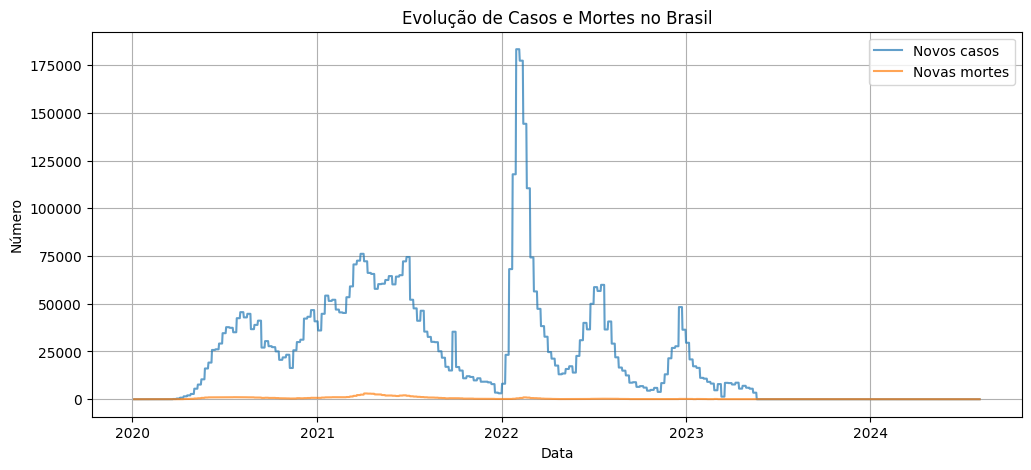

In [54]:
#Evolução de casos e mortes
plt.figure(figsize=(12, 5))
sns.lineplot(data=brasil, x='date', y='new_cases_smoothed', label='Novos casos', alpha=0.7)
sns.lineplot(data=brasil, x='date', y='new_deaths_smoothed', label='Novas mortes', alpha=0.7)
plt.title("Evolução de Casos e Mortes no Brasil")
plt.xlabel("Data")
plt.ylabel("Número")
plt.legend()
plt.grid(True)

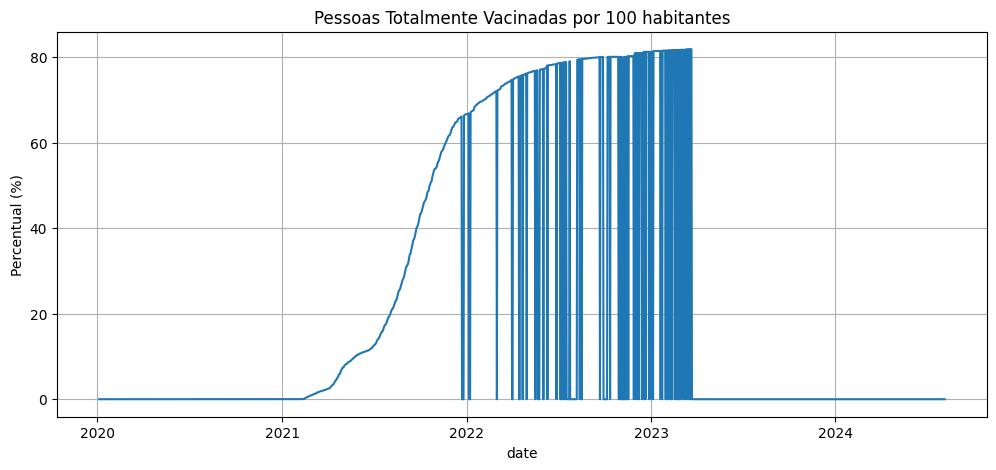

In [55]:
#Vacinação
plt.figure(figsize=(12, 5))
sns.lineplot(data=brasil, x='date', y='people_fully_vaccinated_per_hundred')
plt.title("Pessoas Totalmente Vacinadas por 100 habitantes")
plt.ylabel("Percentual (%)")
plt.grid(True)

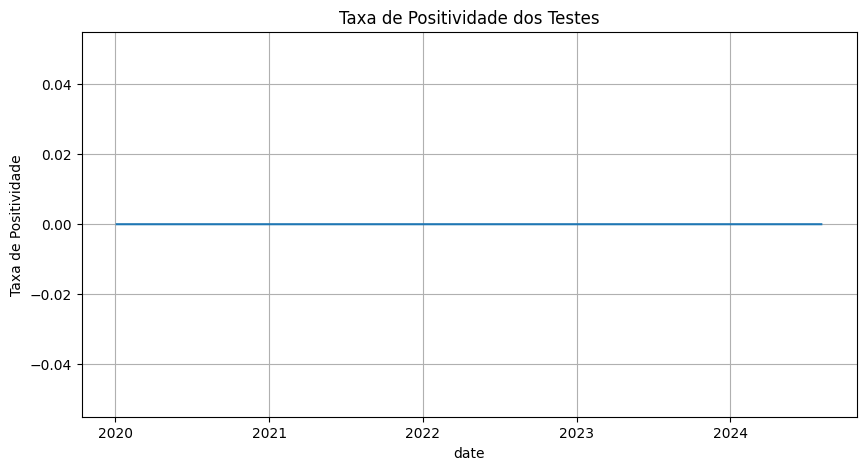

In [56]:
#Testagem e Subnotificação
plt.figure(figsize=(10, 5))
sns.lineplot(data=brasil, x='date', y='positive_rate')
plt.title("Taxa de Positividade dos Testes")
plt.ylabel("Taxa de Positividade")
plt.grid(True)

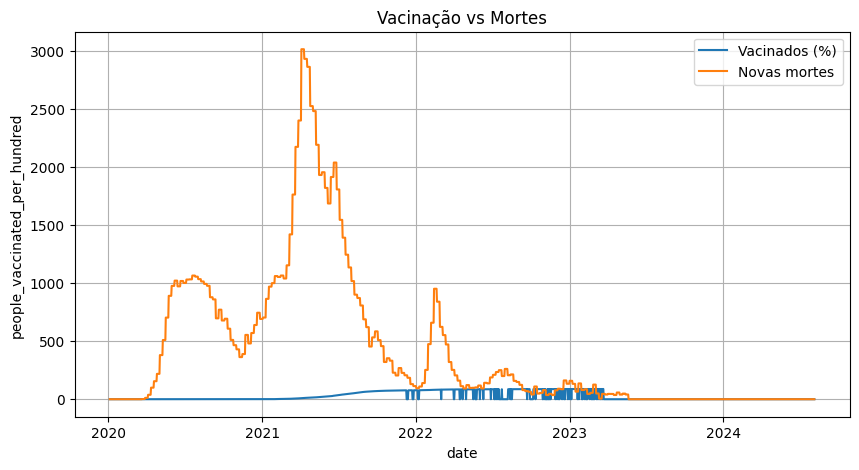

In [57]:
#Vacinação vs Casos/Mortes
plt.figure(figsize=(10, 5))
sns.lineplot(data=brasil, x='date', y='people_vaccinated_per_hundred', label="Vacinados (%)")
sns.lineplot(data=brasil, x='date', y='new_deaths_smoothed', label="Novas mortes")
plt.title("Vacinação vs Mortes")
plt.legend()
plt.grid(True)

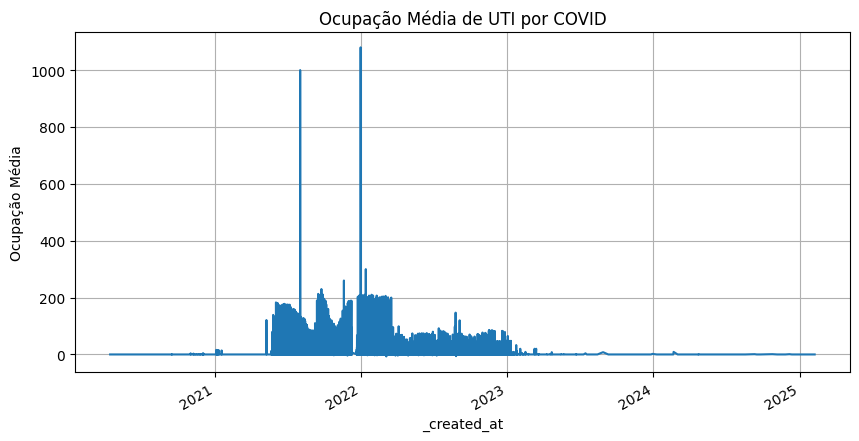

In [58]:
#Ocupação de UTI
df_uti = ocupacao_hospital.groupby('_created_at')['ocupacaoCovidUti'].mean().dropna()

plt.figure(figsize=(10, 5))
df_uti.plot()
plt.title("Ocupação Média de UTI por COVID")
plt.ylabel("Ocupação Média")
plt.grid(True)

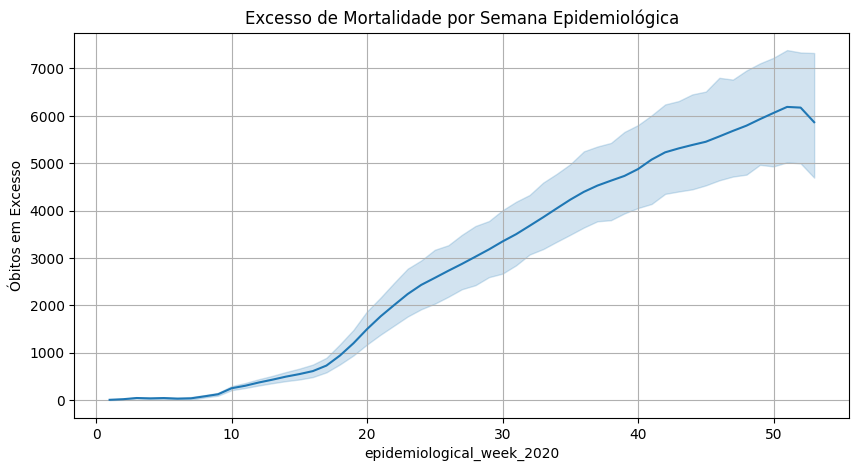

In [59]:
#Excesso de Mortalidade
mortes_estados['excesso'] = mortes_estados['deaths_total_2020'] - mortes_estados['deaths_total_2019']

plt.figure(figsize=(10, 5))
sns.lineplot(data=mortes_estados, x='epidemiological_week_2020', y='excesso')
plt.title("Excesso de Mortalidade por Semana Epidemiológica")
plt.ylabel("Óbitos em Excesso")
plt.grid(True)

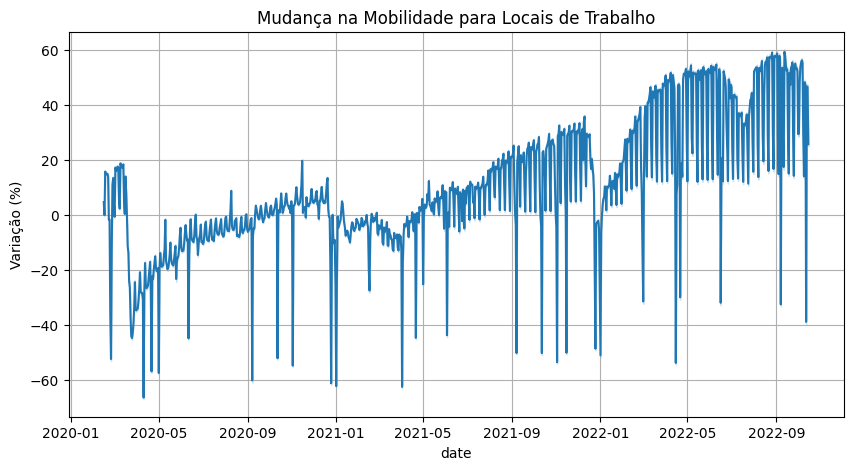

In [60]:
#Mobilidade Urbana
plt.figure(figsize=(10, 5))
sns.lineplot(data=mobilidade, x='date', y='workplaces_percent_change_from_baseline')
plt.title("Mudança na Mobilidade para Locais de Trabalho")
plt.ylabel("Variação (%)")
plt.grid(True)

<ipython-input-71-717be8f3ae88>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mortalidade.head(10), x='state', y='death_rate', palette='Reds')


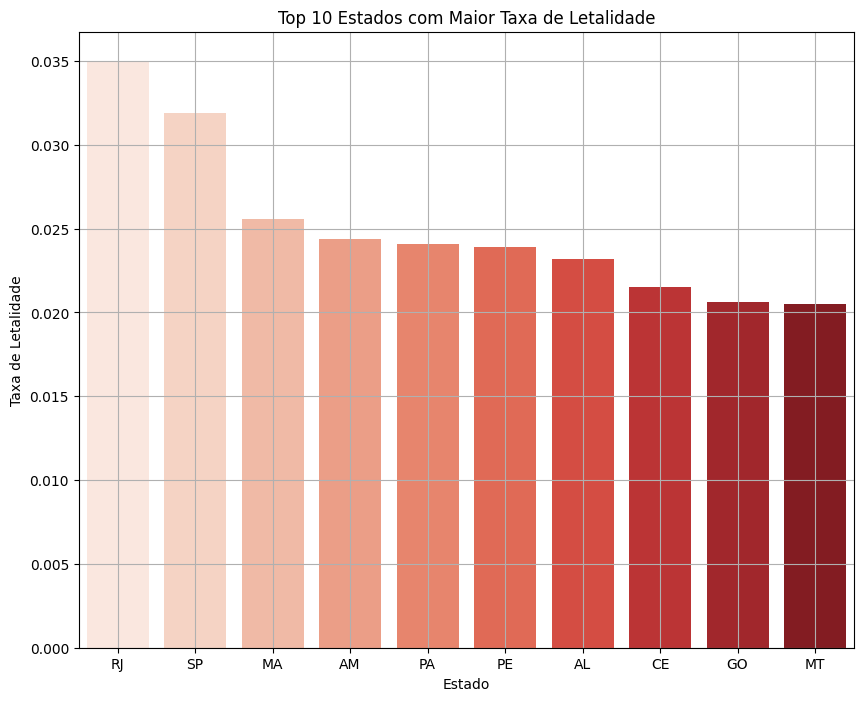

In [71]:
# Pegar última entrada por estado
ultimos_estados = casos_estados.sort_values('date').groupby('state').last().reset_index()

# Remover possíveis entradas agregadas como 'TOTAL'
ultimos_estados = ultimos_estados[ultimos_estados['state'].str.len() == 2]

# Remover valores nulos e ordenar
top_mortalidade = ultimos_estados.dropna(subset=['death_rate']).sort_values('death_rate', ascending=False)

# Gráfico atualizado
plt.figure(figsize=(10, 8))
sns.barplot(data=top_mortalidade.head(10), x='state', y='death_rate', palette='Reds')
plt.title("Top 10 Estados com Maior Taxa de Letalidade")
plt.ylabel("Taxa de Letalidade")
plt.xlabel("Estado")
plt.grid(True)


Text(0.5, 1.0, 'Correlação: Vacinação vs Mortes')

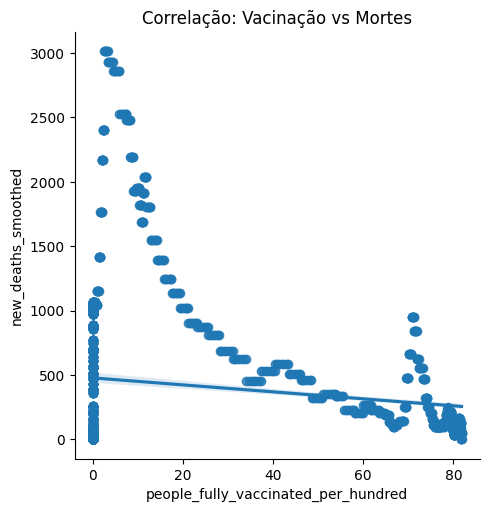

In [62]:
#Associações e Correlações
df_corr = brasil[['people_fully_vaccinated_per_hundred', 'new_deaths_smoothed']].dropna()

sns.lmplot(data=df_corr, x='people_fully_vaccinated_per_hundred', y='new_deaths_smoothed')
plt.title("Correlação: Vacinação vs Mortes")

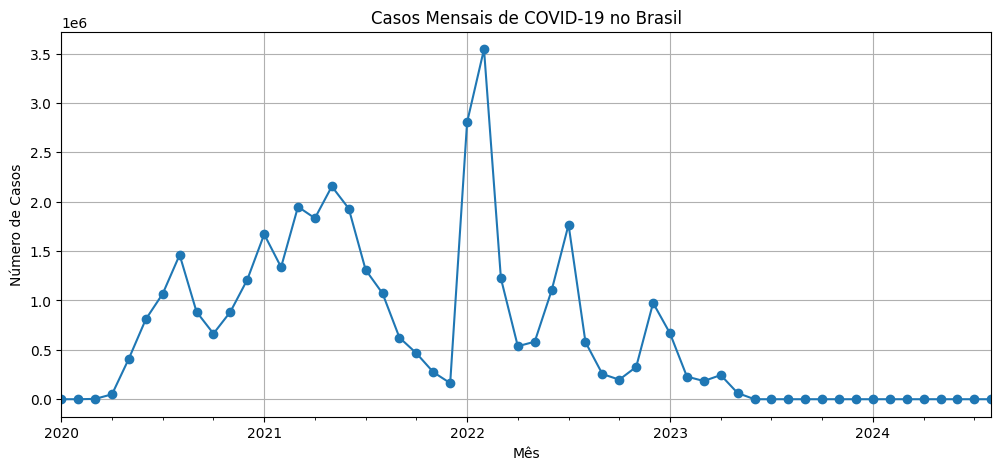

In [65]:
#Casos por mês no Brasil
#Agregando casos por mês
brasil['mes_ano'] = brasil['date'].dt.to_period('M')
casos_mensais = brasil.groupby('mes_ano')['new_cases'].sum()

plt.figure(figsize=(12, 5))
casos_mensais.plot(kind='line', marker='o')
plt.title("Casos Mensais de COVID-19 no Brasil")
plt.xlabel("Mês")
plt.ylabel("Número de Casos")
plt.grid(True)

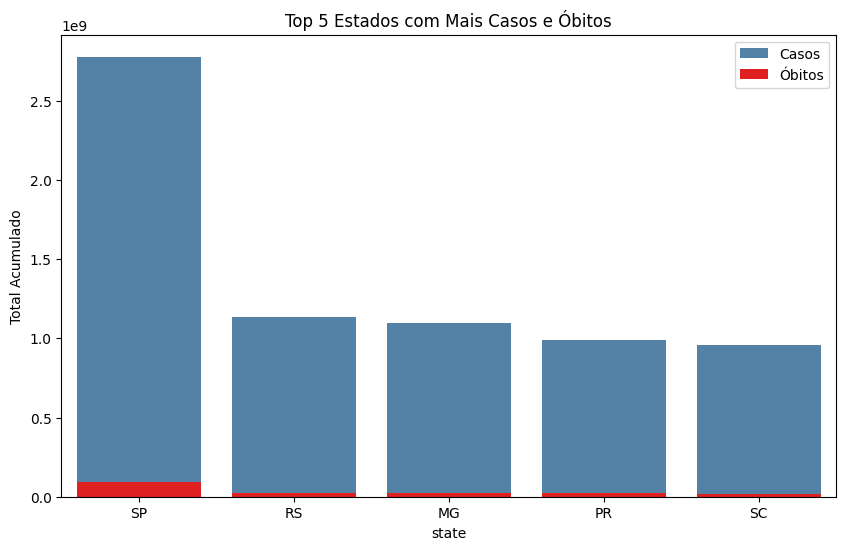

In [66]:
# Top 5 estados com mais casos/óbitos (total acumulado)
# Agrupando dados acumulados por estado
casos_estado_total = casos_estados.groupby('state')[['confirmed', 'deaths']].sum().sort_values('confirmed', ascending=False)

top5_estados = casos_estado_total.head(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_estados, x='state', y='confirmed', color='steelblue', label="Casos")
sns.barplot(data=top5_estados, x='state', y='deaths', color='red', label="Óbitos")
plt.title("Top 5 Estados com Mais Casos e Óbitos")
plt.ylabel("Total Acumulado")
plt.legend()

Text(0.5, 1.0, 'Mapa de Correlação entre Variáveis')

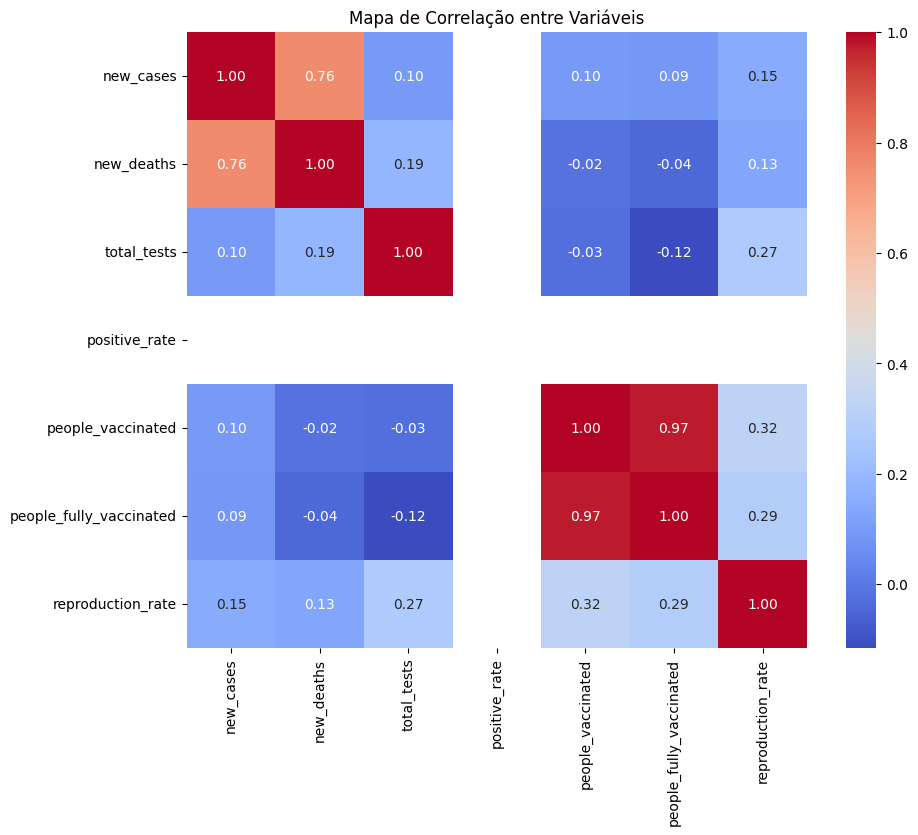

In [67]:
# Heatmap de Correlação
# Selecionar colunas numéricas relevantes
cols_correlacao = ['new_cases', 'new_deaths', 'total_tests', 'positive_rate',
                   'people_vaccinated', 'people_fully_vaccinated', 'reproduction_rate']

df_corr = brasil[cols_correlacao].dropna()
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis")

Text(0, 0.5, 'Novos Casos')

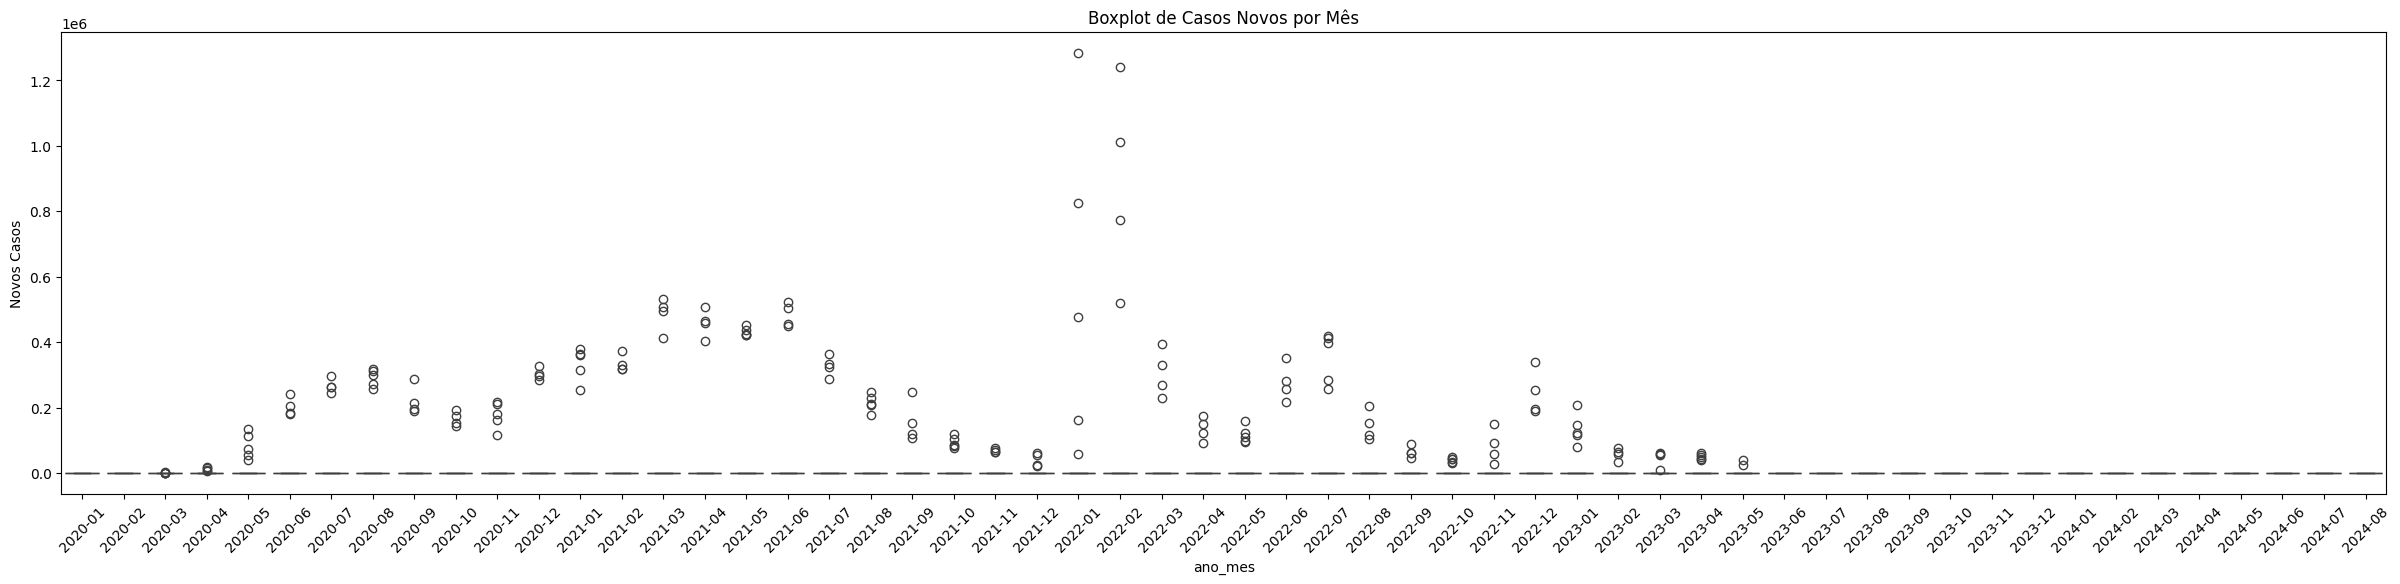

In [72]:
# Boxplot de Casos por Mês (Sazonalidade)
brasil['ano_mes'] = brasil['date'].dt.to_period('M')
brasil_boxplot = brasil[['ano_mes', 'new_cases']].dropna()

plt.figure(figsize=(30, 6))
sns.boxplot(data=brasil_boxplot, x='ano_mes', y='new_cases')
plt.xticks(rotation=45)
plt.title("Boxplot de Casos Novos por Mês")
plt.ylabel("Novos Casos")

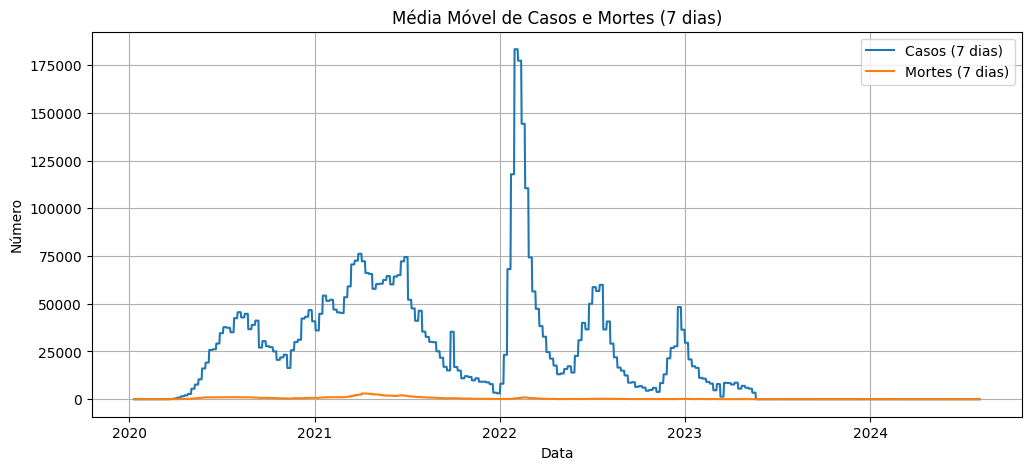

In [69]:
#Média Móvel de 7 Dias (Rolling Average)
brasil['media_movel_casos'] = brasil['new_cases'].rolling(7).mean()
brasil['media_movel_mortes'] = brasil['new_deaths'].rolling(7).mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=brasil, x='date', y='media_movel_casos', label="Casos (7 dias)")
sns.lineplot(data=brasil, x='date', y='media_movel_mortes', label="Mortes (7 dias)")
plt.title("Média Móvel de Casos e Mortes (7 dias)")
plt.xlabel("Data")
plt.ylabel("Número")
plt.legend()
plt.grid(True)

Text(170.72222222222223, 0.5, 'Estado')

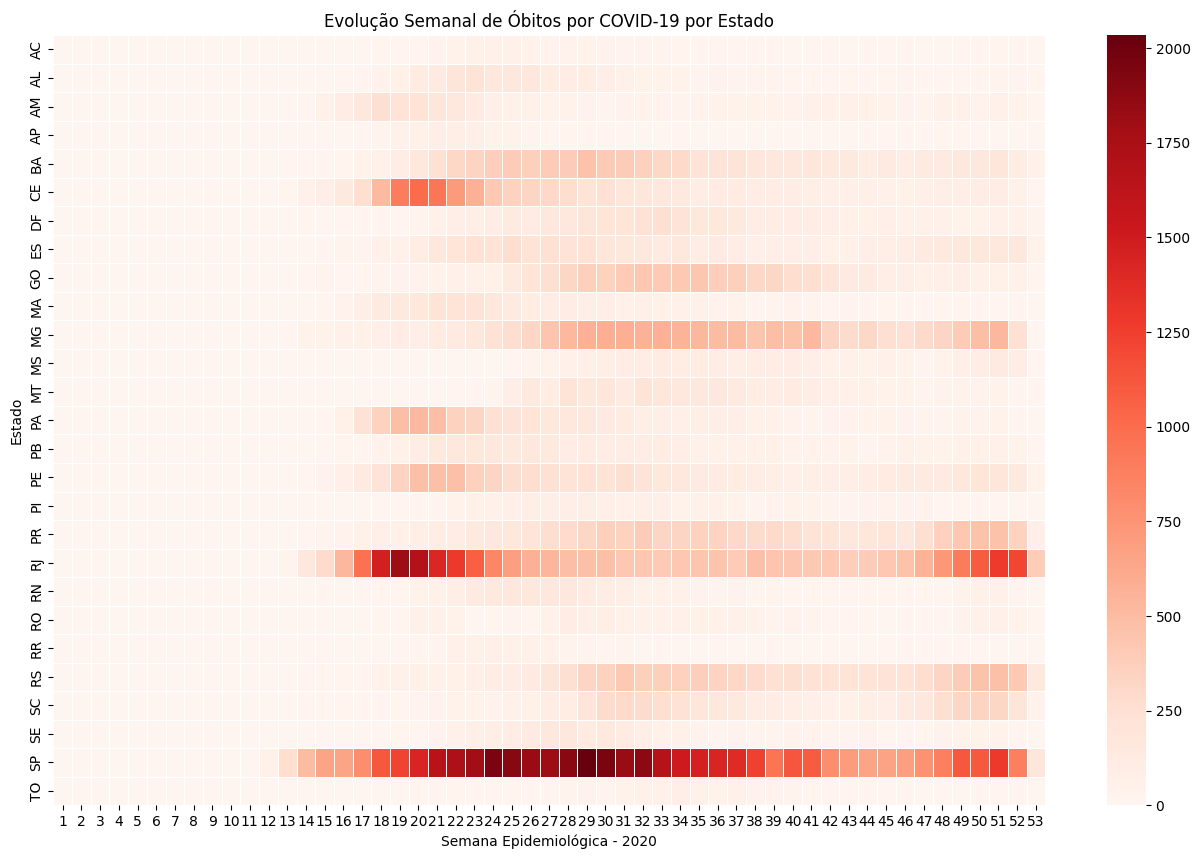

In [73]:
# Mapa de calor da evolução semanal de óbitos por estado
heatmap_data = mortes_estados.pivot_table(
    index='state',
    columns='epidemiological_week_2020',
    values='new_deaths_covid19',
    aggfunc='sum'
)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=.5)
plt.title("Evolução Semanal de Óbitos por COVID-19 por Estado")
plt.xlabel("Semana Epidemiológica - 2020")
plt.ylabel("Estado")

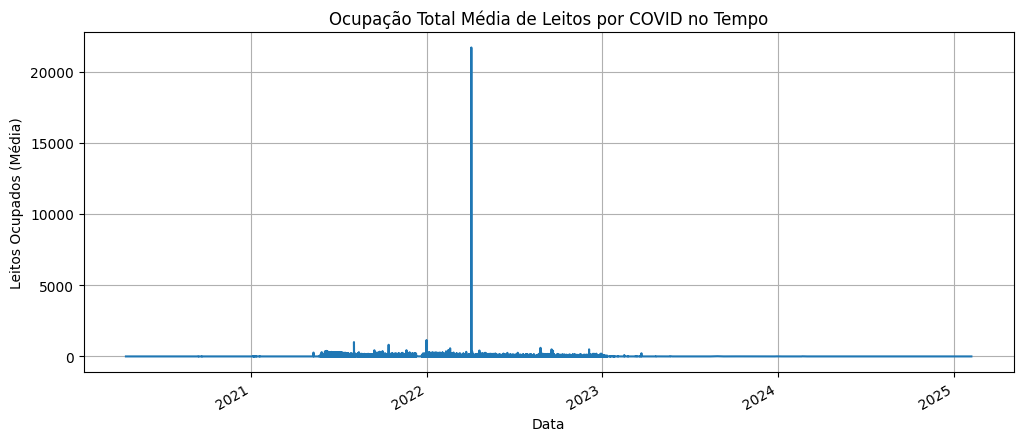

In [74]:
# Ocupação hospitalar total ao longo do tempo (UTI + Clínica)
ocupacao_hospital['_created_at'] = pd.to_datetime(ocupacao_hospital['_created_at'])
ocupacao_hospital['ocupacao_total'] = ocupacao_hospital['ocupacaoCovidUti'] + ocupacao_hospital['ocupacaoCovidCli']

df_ocupacao = ocupacao_hospital.groupby('_created_at')['ocupacao_total'].mean()

plt.figure(figsize=(12, 5))
df_ocupacao.plot()
plt.title("Ocupação Total Média de Leitos por COVID no Tempo")
plt.ylabel("Leitos Ocupados (Média)")
plt.xlabel("Data")
plt.grid(True)

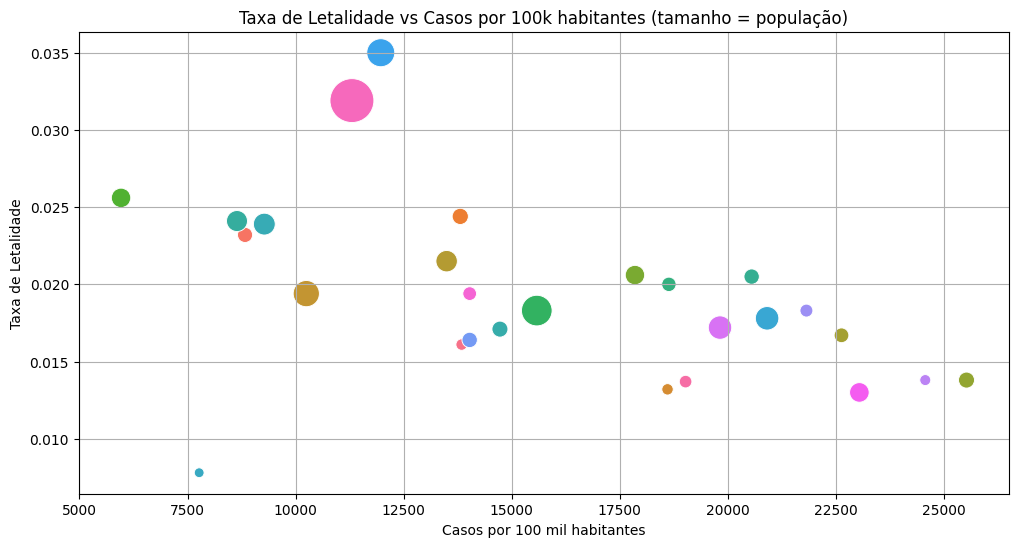

In [75]:
#Taxa de Letalidade por Estado com População Estimada
# Filtrar últimas entradas válidas
casos_estados['date'] = pd.to_datetime(casos_estados['date'])
ultimos = casos_estados.sort_values('date').groupby('state').last().reset_index()
ultimos = ultimos[ultimos['state'].str.len() == 2]

# Plot com tamanho proporcional à população
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ultimos, x='confirmed_per_100k_inhabitants', y='death_rate',
                size='estimated_population', hue='state', sizes=(50, 1000), legend=False)

plt.title("Taxa de Letalidade vs Casos por 100k habitantes (tamanho = população)")
plt.xlabel("Casos por 100 mil habitantes")
plt.ylabel("Taxa de Letalidade")
plt.grid(True)

Text(0.5, 1.0, 'Evolução da Vacinação vs Mortes')

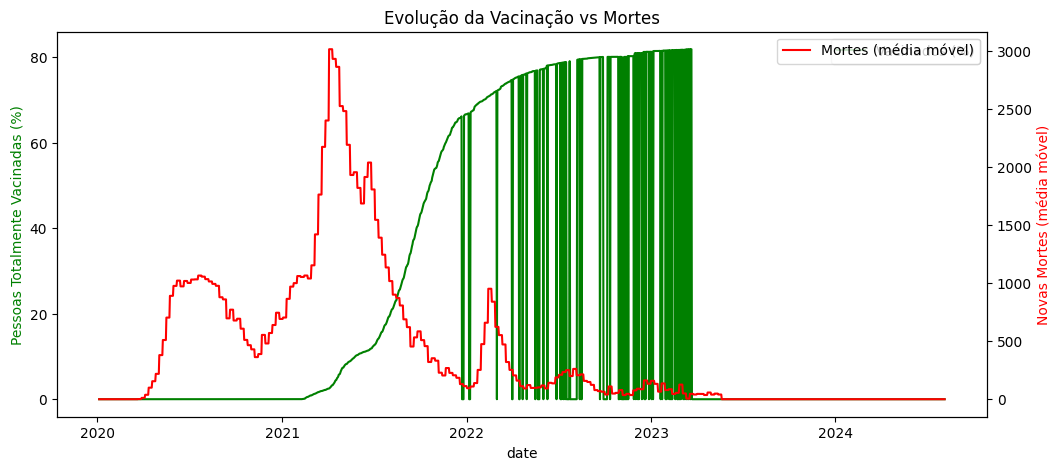

In [76]:
#Impacto da Vacinação na Mortalidade ao longo do tempo
fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()

sns.lineplot(data=brasil, x='date', y='people_fully_vaccinated_per_hundred', color='green', ax=ax1, label='Vacinados (%)')
sns.lineplot(data=brasil, x='date', y='new_deaths_smoothed', color='red', ax=ax2, label='Mortes (média móvel)')

ax1.set_ylabel('Pessoas Totalmente Vacinadas (%)', color='green')
ax2.set_ylabel('Novas Mortes (média móvel)', color='red')
ax1.set_title("Evolução da Vacinação vs Mortes")

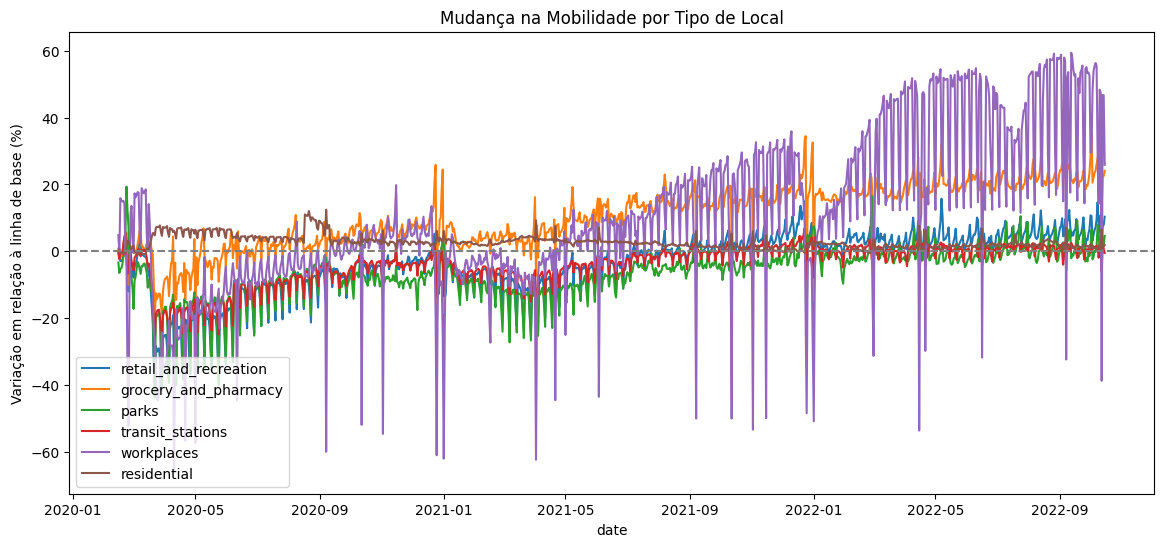

In [77]:
#Mudança de mobilidade por categoria
mobilidade['date'] = pd.to_datetime(mobilidade['date'])
df_mob = mobilidade.groupby('date').mean(numeric_only=True)

plt.figure(figsize=(14, 6))
for coluna in df_mob.columns:
    if 'percent_change' in coluna:
        sns.lineplot(data=df_mob, x=df_mob.index, y=coluna, label=coluna.split('_percent')[0])

plt.axhline(0, color='gray', linestyle='--')
plt.title("Mudança na Mobilidade por Tipo de Local")
plt.ylabel("Variação em relação à linha de base (%)")
plt.legend(loc='lower left')